2세대 인공지능은 데이터 기반
- 양질의 데이터가 많을 수록 좋다

인공지능 성능을 개선하는 현실적인 방법 3가지
- 더 좋은 데이터를 찾는다
- 데이터를 더 잘 가공한다
- 더 좋은 모델을 개발한다

1. 데이터 수집

양 vs 질?

좋은 사이트를 참고하자 (Kaggle, UCI ML repository)


2. (전)처리

데이터의 질을 높여보자

좋은 모델을 만들기 위해 매우 중요한 부분

* 머신러닝의 80/20 규칙

- 정제 (빈칸, 중복 처리)
- 변형 (분포 변환)
- 랭글링 등


3. 모델 선정

model = [원하는 모델]

- 문제 상황에 적합한 모델이 있다
- 하지만, 기초 수준에서는 무리
- 구글링, 깃허브를 잘 쓰자!


4. 학습

- fit(X_train) / fit(X_train,y_train)
- 정확도 기준을 정하자
- 학습 과정을 살펴보자


5 성능 평가, 튜닝

- predict(X_test) 
- 학습에 사용하지 않은 데이터로 정확도 측정
- 성능이 구리면 모델 설정을 바꿔보자

- GIGO (garbage in, garbage out)


In [21]:
%matplotlib inline

# matplotlib의 색상 테마 설정
cmap = getattr(cm, 'plasma_r', cm.hot_r)

In [22]:
from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing()
X_full, y_full = dataset.data, dataset.target

print(X_full.shape)
print(y_full.shape)

(20640, 8)
(20640,)


In [6]:
X = X_full[:, [0, 5]]

print(X.shape)
print(X)

(20640, 2)
[[8.3252     2.55555556]
 [8.3014     2.10984183]
 [7.2574     2.80225989]
 ...
 [1.7        2.3256351 ]
 [1.8672     2.12320917]
 [2.3886     2.61698113]]


In [23]:
from sklearn.preprocessing import StandardScaler
print(StandardScaler().fit_transform(X))

[[ 2.34476576 -0.04959654]
 [ 2.33223796 -0.09251223]
 [ 1.7826994  -0.02584253]
 ...
 [-1.14259331 -0.0717345 ]
 [-1.05458292 -0.09122515]
 [-0.78012947 -0.04368215]]


processor = [분포변환모델] : 모델 만들기
- .fit(X) : 데이터에 맞게 변환식 계산
- .transform(X) : 데이터에 변환식을 적용
- .fit_transform(X) : fit + transform

In [24]:
import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

from sklearn.preprocessing import MinMaxScaler,minmax_scale,MaxAbsScaler,StandardScaler,RobustScaler
from sklearn.preprocessing import Normalizer,QuantileTransformer,PowerTransformer

- create_axes: 축 만들기
- plot_distribution: 분포를 그래프 위에 표시하기
- make_plot: 그래프 만들기

In [25]:
def create_axes(title, figsize=(16, 6)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    # 전체 분포
    left, width = 0.1, 0.22
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.15
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx = plt.axes(rect_histx)
    ax_histy = plt.axes(rect_histy)

    # outlier를 제외하고 확대한 분포
    left = width + left + 0.2
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter_zoom = plt.axes(rect_scatter)
    ax_histx_zoom = plt.axes(rect_histx)
    ax_histy_zoom = plt.axes(rect_histy)

    # colorbar의 축 설정
    left, width = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return ((ax_scatter, ax_histy, ax_histx),
            (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
            ax_colorbar)


def plot_distribution(axes, X, y, hist_nbins=50, title="",
                      x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # 점들을 표시해보자
    colors = cmap(y)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5, marker='o', s=5, lw=0, c=colors)

    # 예쁘게 만들기
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))

    # X축 히스토그램 (feature 0) 
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(X[:, 0], bins=hist_nbins, orientation='vertical',
                 color='grey', ec='grey')
    hist_X0.axis('off')
    
    # Y축 히스토그램 (feature 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(X[:, 1], bins=hist_nbins, orientation='horizontal',
                 color='grey', ec='grey')
    hist_X1.axis('off')
    
    
def make_plot(item_idx):
    # 전체 분포도 표시
    title, X = distributions[item_idx]
    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
    axarr = (ax_zoom_out, ax_zoom_in)
    plot_distribution(axarr[0], X, y, hist_nbins=200,
                      x0_label="Median Income",
                      x1_label="Number of households",
                      title="Full data")

    # 확대 분포도 표시
    zoom_in_percentile_range = (0, 99)
    cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)

    non_outliers_mask = (
        np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) &
        np.all(X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1))
    plot_distribution(axarr[1], X[non_outliers_mask], y[non_outliers_mask],
                      hist_nbins=50,
                      x0_label="Median Income",
                      x1_label="Number of households",
                      title="Zoom-in")

    # colorbar 표시
    norm = mpl.colors.Normalize(y_full.min(), y_full.max())
    mpl.colorbar.ColorbarBase(ax_colorbar, cmap=cmap,
                              norm=norm, orientation='vertical',
                              label='Color mapping for values of y')

In [26]:
distributions = [
    ('raw data', X),
    ('standard scaling', StandardScaler().fit_transform(X)),
    ('min-max scaling', MinMaxScaler().fit_transform(X)),
    ('robust scaling', RobustScaler(quantile_range=(25, 75)).fit_transform(X)),
    ('power transformation (Yeo-Johnson)', PowerTransformer(method='yeo-johnson').fit_transform(X)),
    ('power transformation (Box-Cox)', PowerTransformer(method='box-cox').fit_transform(X)),
    ('quantile transformation (gaussian pdf)', QuantileTransformer(output_distribution='normal').fit_transform(X)),
    ('quantile transformation (uniform pdf)', QuantileTransformer(output_distribution='uniform').fit_transform(X)),
    ('sample-wise L2 normalizing', Normalizer().fit_transform(X)),
]

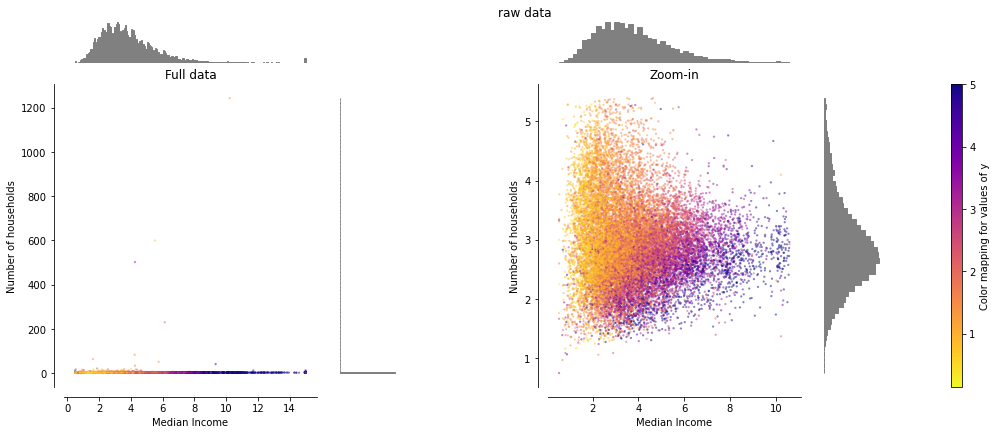

In [28]:
y = minmax_scale(y_full)
make_plot(0)

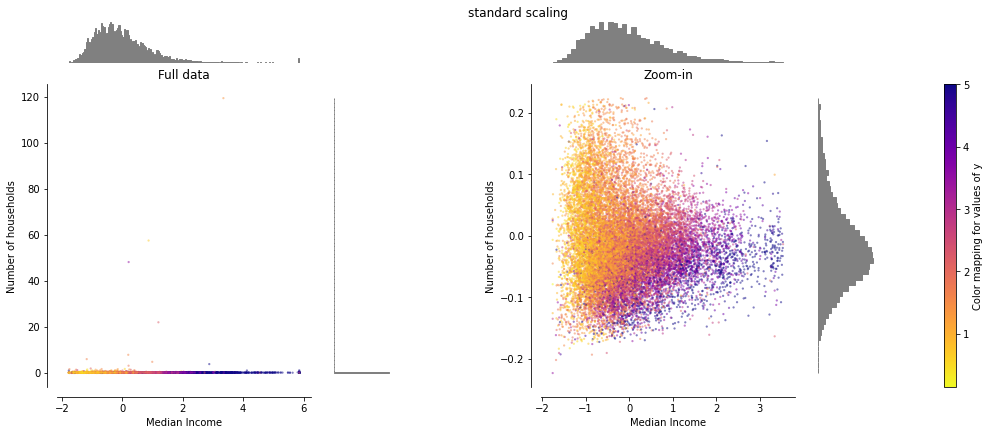

In [29]:
make_plot(1)

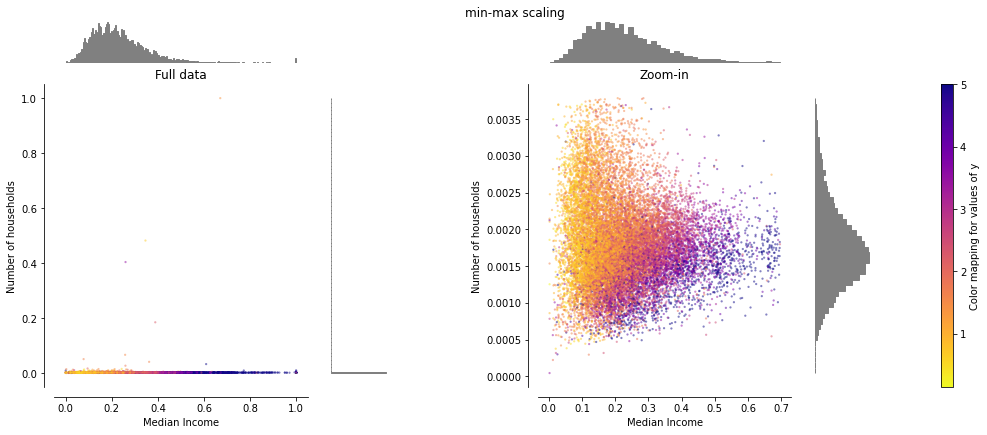

In [31]:
make_plot(2)

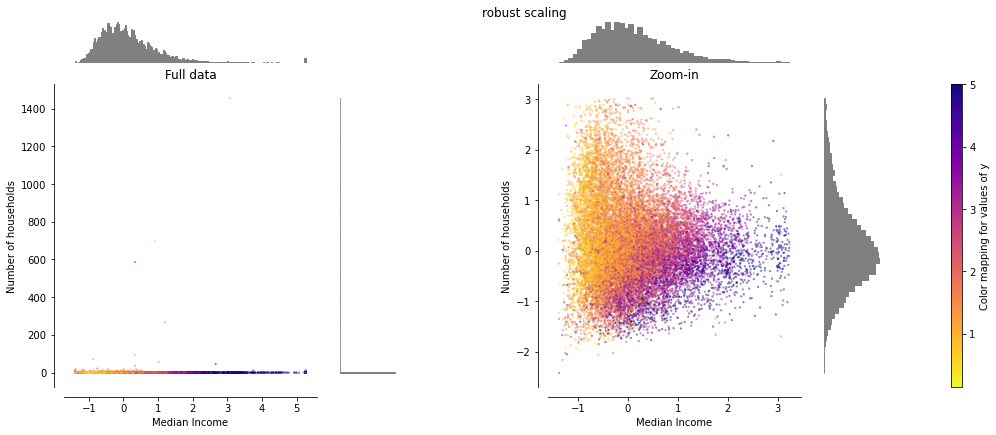

In [34]:
make_plot(3)

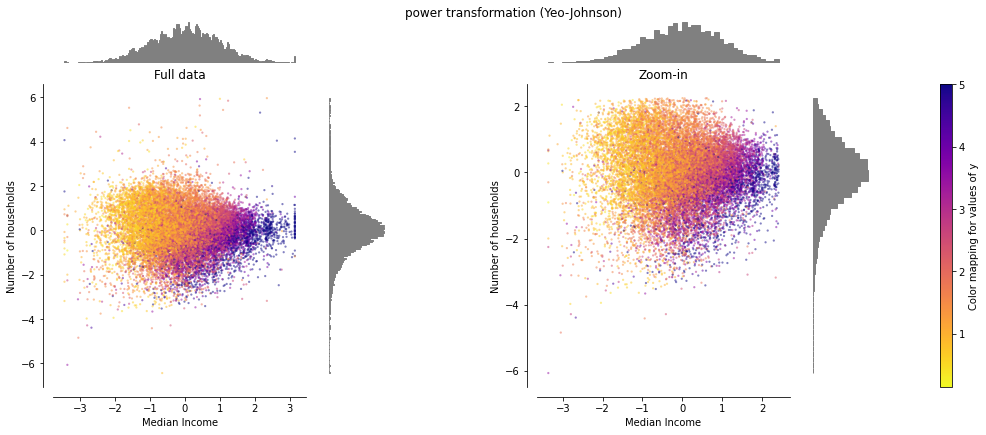

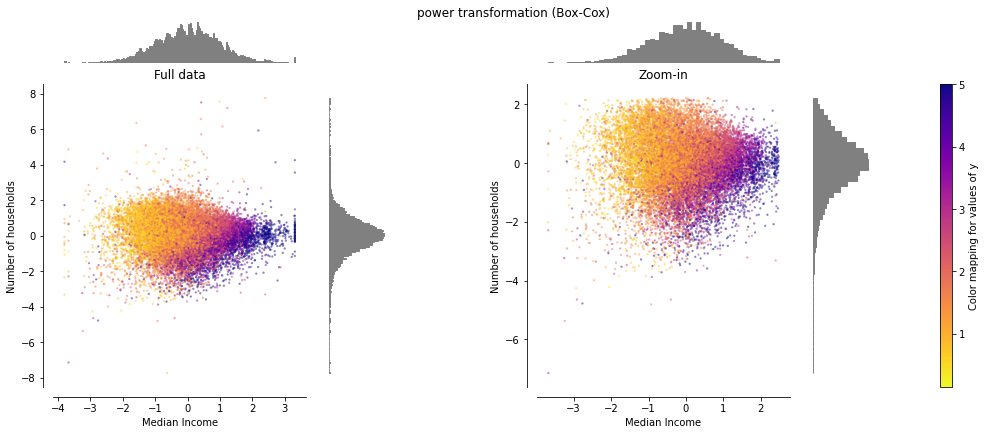

In [46]:
make_plot(4)
make_plot(5)

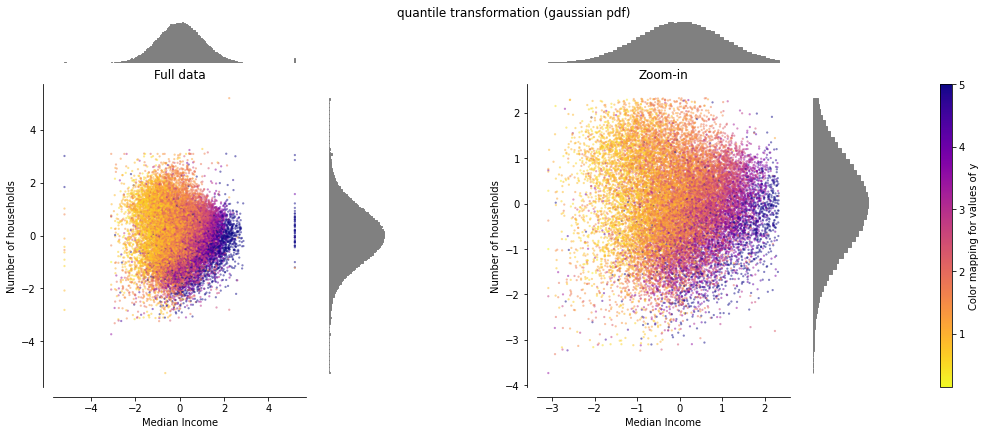

In [35]:
make_plot(6)

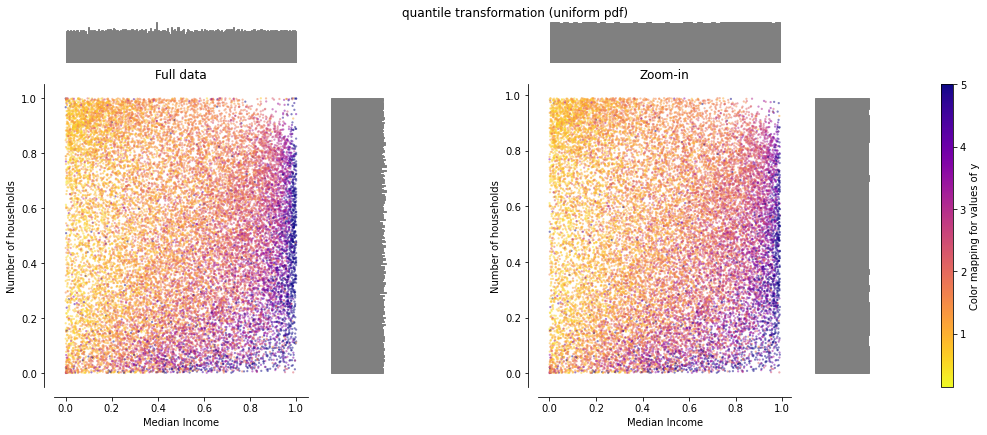

In [36]:
make_plot(7)

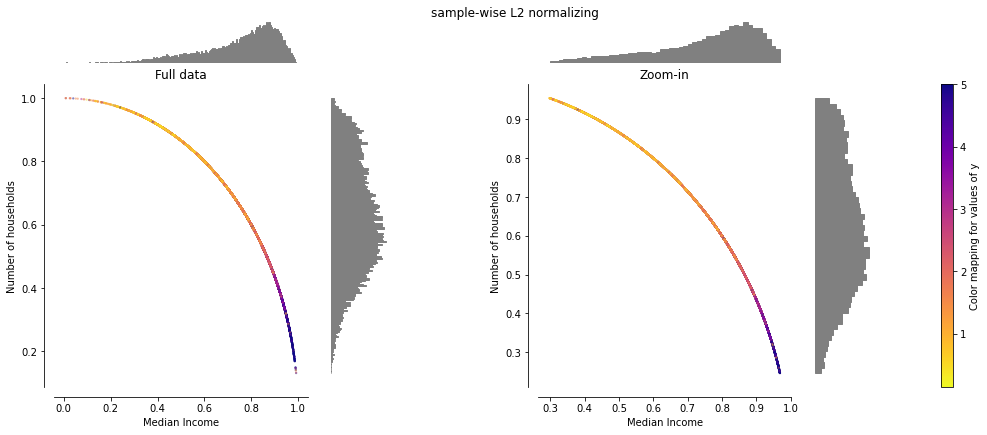

In [37]:
make_plot(8)

In [22]:
import pandas as pd
import nltk

email_df=pd.read_csv("emails/emails.csv")
email_df.head()

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [23]:
X = email_df.iloc[:,0]
y = email_df.iloc[:,1]

print(X[0])
print('----------------------------------')
print(y[0])

allen-p/_sent_mail/1.
----------------------------------
Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>
Date: Mon, 14 May 2001 16:39:00 -0700 (PDT)
From: phillip.allen@enron.com
To: tim.belden@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Tim Belden <Tim Belden/Enron@EnronXGate>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Here is our forecast

 


In [24]:
sentence = "The quick brown fox jumps over the lazy dog"
paragraph = "NLP is a subfield of computer science and artificial intelligence concerned with interactions between computers and human (natural) languages. It is used to apply machine learning algorithms to text and speech."

In [26]:
from nltk.tokenize import word_tokenize # 토큰화 함수

tokens = word_tokenize(sentence)
print(tokens)

['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']


In [27]:
from nltk import pos_tag # 품사 태깅 함수

print(pos_tag(tokens))

[('The', 'DT'), ('quick', 'JJ'), ('brown', 'NN'), ('fox', 'NN'), ('jumps', 'VBZ'), ('over', 'IN'), ('the', 'DT'), ('lazy', 'JJ'), ('dog', 'NN')]


In [30]:
from nltk.corpus import stopwords # 불용어 코퍼스

stop_words = set(stopwords.words('english')) # 영어의 불용어 코퍼스를 집합으로 불러온다

tokens = [w for w in tokens if not w in stop_words] # 불용어 집합에 없는 토큰들만 추출
print(tokens)

['The', 'quick', 'brown', 'fox', 'jumps', 'lazy', 'dog']


In [31]:
tokens = [token.lower() for token in tokens]
print(tokens)

['the', 'quick', 'brown', 'fox', 'jumps', 'lazy', 'dog']


In [32]:
tokens = [w for w in tokens if not w in stop_words] # 불용어 집합에 없는 토큰들만 추출
print(tokens)

['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog']


In [33]:
from nltk.tokenize import RegexpTokenizer

regexp_tokenizer = RegexpTokenizer(r'\w+') # r'\w+' 는 문자 또는 숫자가 1개 이상인 경우를 인식하는 코드 (우선은 그냥 사용합시다)
p_tokens = regexp_tokenizer.tokenize(paragraph)
print(p_tokens)

['NLP', 'is', 'a', 'subfield', 'of', 'computer', 'science', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'interactions', 'between', 'computers', 'and', 'human', 'natural', 'languages', 'It', 'is', 'used', 'to', 'apply', 'machine', 'learning', 'algorithms', 'to', 'text', 'and', 'speech']


In [34]:
#어간 추출 모델에는 Porter stemmer, Lancaster Stemmer, Snowball Stemmer 등이 있다
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
stems = []
for t in tokens:    
    stems.append(porter.stem(t))
print(tokens)
# 위와 같은 코드입니다
# stems = [porter.stem(t) for t in tokens]
print(stems)

['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog']
['quick', 'brown', 'fox', 'jump', 'lazi', 'dog']


In [35]:
#표제어 추출 모델로는 대표적으로 WordNetLemmatizer이 있다
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
lemma = []
for t in tokens:
    lemma.append(lemmatizer.lemmatize(t))
print(tokens)
print(lemma) 

['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog']
['quick', 'brown', 'fox', 'jump', 'lazy', 'dog']


In [37]:
import gensim
from nltk.data import find

# 미리 학습된 Word2Vec 샘플 모델을 불러옵니다
word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt')) 
w2v_model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)

In [45]:
print(len(w2v_model)) # 모델이 학습한 단어 개수
print(len(w2v_model['quick'])) # 임베딩 벡터의 크기 (어느 단어에 대해서나 같아요)
print(w2v_model['quick']) # 단어 quick의 임베딩 벡터

43981
300
[ 1.33774e-01  5.66624e-03 -1.16347e-02  4.67402e-02 -1.59158e-02
 -4.67402e-02  1.50470e-03 -1.74268e-02  3.24361e-02  1.05770e-02
  5.39930e-02 -1.75276e-02  2.14562e-02  3.06229e-02 -1.65202e-02
  1.26924e-02  1.02748e-01 -2.96155e-02  4.19050e-02 -4.71431e-02
  3.04214e-02  4.95607e-02 -1.41026e-02  5.27842e-02 -5.88281e-02
 -3.08243e-02 -1.23398e-02  5.27842e-02  4.15020e-02  2.50825e-02
 -7.61542e-02  7.29308e-02  8.71342e-03 -6.60809e-02 -3.88830e-02
  1.90386e-02  2.19598e-02 -1.89378e-02  3.70698e-02 -8.56232e-03
  8.38100e-02 -6.40663e-02  1.52308e-01  2.09525e-02  4.67402e-02
  1.80312e-02 -6.04399e-02  2.35716e-02  2.03481e-02  6.00369e-02
  7.60535e-03  4.59343e-02 -3.20331e-02 -2.79534e-03 -4.39196e-02
  1.52308e-01 -7.45425e-02 -2.56869e-02 -2.15569e-02 -3.58610e-02
 -6.84985e-02  9.41855e-03 -1.46667e-01 -5.76193e-02  1.55129e-02
 -4.15020e-02  2.65684e-03 -6.72897e-02 -2.00459e-02 -7.17724e-04
 -2.27657e-02  6.84985e-02  3.97896e-03 -5.56047e-02 -1.12015e-01


In [47]:
w2v_model.most_similar(positive=['quick'], topn = 3) # 가장 가까운 단어 (유의어) 3개

[('swift', 0.6208426356315613),
 ('speedy', 0.5804499387741089),
 ('fast', 0.5701605677604675)]

In [48]:
from PIL import Image
from matplotlib.pyplot import imshow

In [50]:
image = Image.open('dog.jpg')
print(image.format, image.size, image.mode)

JPEG (1500, 1099) RGB


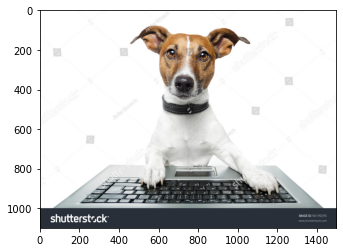

In [51]:
imshow(image)

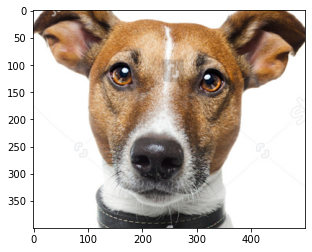

In [52]:
# left, upper, right, and lower pixel coordinate 
cropped = image.crop(box=(500,100,1000,500))
imshow(cropped)

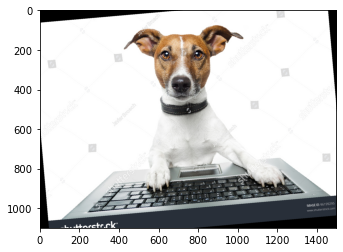

In [53]:
rotated = image.rotate(5)
imshow(rotated)

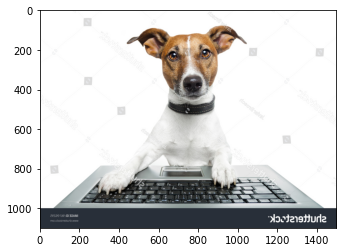

In [54]:
flipped = image.transpose(Image.FLIP_LEFT_RIGHT)
imshow(flipped)

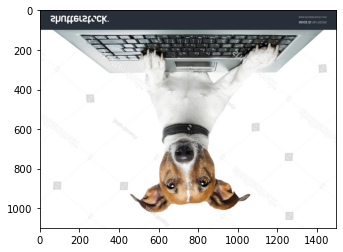

In [55]:
flipped2 = image.transpose(Image.FLIP_TOP_BOTTOM)
imshow(flipped2)

In [56]:
%matplotlib inline
from matplotlib.pyplot import imshow
import numpy as np

pixels = np.asarray(image)
print(pixels.shape)
print(pixels)

(1099, 1500, 3)
[[[254 254 254]
  [255 255 255]
  [251 251 251]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [253 253 253]
  [250 250 250]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [253 253 253]
  [250 250 250]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 40  47  57]
  [ 40  47  57]
  [ 40  47  57]
  ...
  [ 40  47  57]
  [ 40  47  57]
  [ 40  47  57]]

 [[ 40  47  57]
  [ 40  47  57]
  [ 40  47  57]
  ...
  [ 40  47  57]
  [ 40  47  57]
  [ 40  47  57]]

 [[ 40  47  57]
  [ 40  47  57]
  [ 40  47  57]
  ...
  [ 40  47  57]
  [ 40  47  57]
  [ 40  47  57]]]


In [59]:
means = pixels.mean(axis=(0,1))
print('Means: {}'.format(means))
print('Mins: {}'.format(pixels.min(axis=(0,1))))
print('Maxs: {}'.format(pixels.max(axis=(0,1))))

Means: [208.01938065 207.40703913 206.48996785]
Mins: [0 0 0]
Maxs: [255 255 255]


In [61]:
centered = pixels - means
means = centered.mean(axis=(0,1))
print('Means: {}'.format(means))
print('Mins: {}'.format(centered.min(axis=(0,1))))
print('Maxs: {}'.format(centered.max(axis=(0,1))))

Means: [208.01938065 207.40703913 206.48996785]
Mins: [-1.64722036e-10  8.63454027e-10 -4.21941862e-10]
Maxs: [255. 255. 255.]
